# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 626


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [16]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if i >= 50 and (i % 50 == 0):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response = requests.get(city_url)
        if response.status_code == 200:
            # Parse the JSON and retrieve data
            city_weather = response.json()

            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp_kelvin = city_weather["main"]["temp_max"]
            city_max_temp_fahrenheit = (city_max_temp_kelvin - 273.15) * 9/5 + 32
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
            city_date = city_weather["dt"]

            # Append the City information into city_data list
            city_data.append({"City": city, 
                            "Lat": city_lat, 
                            "Lng": city_lng, 
                            "Max Temp": city_max_temp_fahrenheit,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pont rouge
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | port lincoln
Processing Record 5 of Set 1 | sitka
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | west island
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | amungan
Processing Record 10 of Set 1 | sofifi
Processing Record 11 of Set 1 | hithadhoo
Processing Record 12 of Set 1 | anthiyur
Processing Record 13 of Set 1 | ghat
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | tura
Processing Record 16 of Set 1 | portland
Processing Record 17 of Set 1 | bisalpur
Processing Record 18 of Set 1 | muta
Processing Record 19 of Set 1 | atafu village
Processing Record 20 of Set 1 | jwaneng
Processing Record 21 of Set 1 | iqaluit
Processing Record 22 of Set 1 | blackmans bay
Processing Record 23 of Set 1 |

In [17]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          596
Lat           596
Lng           596
Max Temp      596
Humidity      596
Cloudiness    596
Wind Speed    596
Country       596
Date          596
dtype: int64

In [19]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pont rouge,48.8833,-72.0825,17.888,95,100,2.27,CA,1701209469
1,port-aux-francais,-49.3500,70.2167,42.404,98,100,10.90,TF,1701209469
2,adamstown,-25.0660,-130.1015,73.616,86,69,6.62,PN,1701209470
3,port lincoln,-34.7333,135.8667,61.484,81,61,7.56,AU,1701209183
4,sitka,57.0531,-135.3300,42.692,81,40,0.00,US,1701209273


In [21]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [22]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pont rouge,48.8833,-72.0825,17.888,95,100,2.27,CA,1701209469
1,port-aux-francais,-49.3500,70.2167,42.404,98,100,10.90,TF,1701209469
2,adamstown,-25.0660,-130.1015,73.616,86,69,6.62,PN,1701209470
3,port lincoln,-34.7333,135.8667,61.484,81,61,7.56,AU,1701209183
4,sitka,57.0531,-135.3300,42.692,81,40,0.00,US,1701209273


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

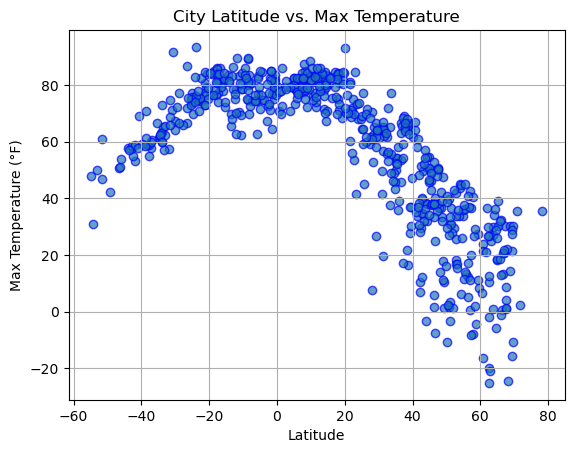

In [24]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolor="blue", alpha=0.7)
# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")

# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

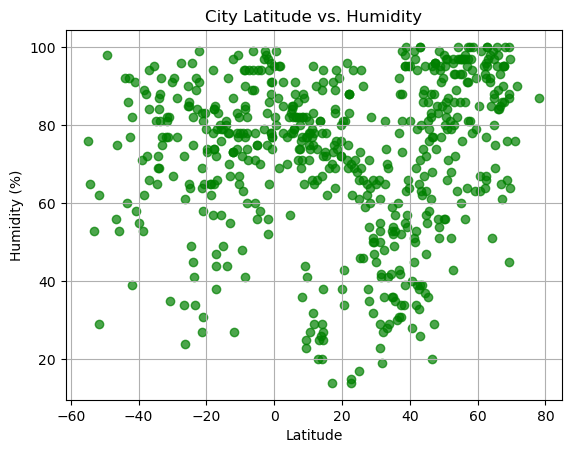

In [36]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", color="green", edgecolor="green", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

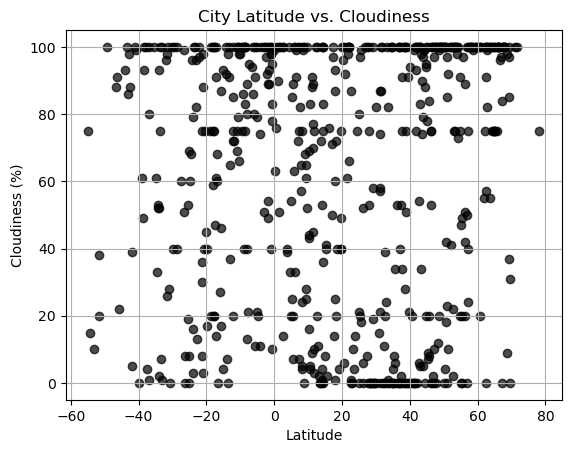

In [35]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", color="black", edgecolor="black", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

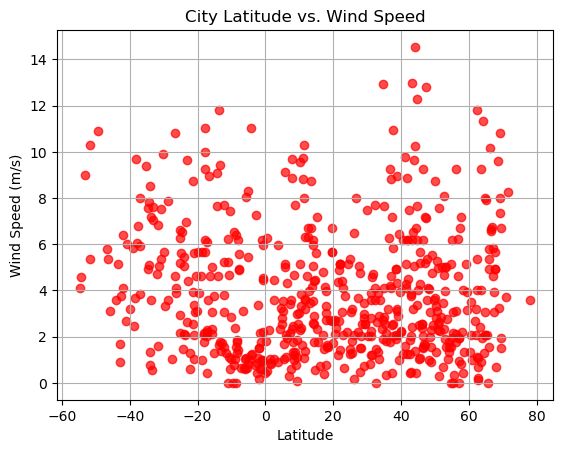

In [34]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", color="red", edgecolor="red", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [69]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, figname):
    # Perform linear regression and calculate the r-value
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Calculate the regression line
    regress_values = x_values * slope + intercept

    # Create a scatter plot
    plt.scatter(x_values, y_values, marker="o", edgecolor="blue", alpha=0.7)

    # Plot the regression line
    plt.plot(x_values, regress_values, "r-")

    # Annotate the equation of the line on the plot
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}\nR-value = {rvalue:.2f}"  # Update here
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")

    # Set labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Save the figure
    plt.savefig(fig5)

    # Show the plot
    plt.show()

    return rvalue  # Return the calculated R-value


In [44]:
# Create a DataFrame for the Northern Hemisphere data
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pont rouge,48.8833,-72.0825,17.888,95,100,2.27,CA,1701209469
4,sitka,57.0531,-135.3300,42.692,81,40,0.00,US,1701209273
7,bethel,41.3712,-73.4140,33.674,51,0,4.12,US,1701209473
8,amungan,15.3652,119.9582,80.402,72,41,2.32,PH,1701209473
10,anthiyur,11.5833,77.6000,72.338,95,89,1.39,IN,1701209475


In [45]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,42.404,98,100,10.90,TF,1701209469
2,adamstown,-25.0660,-130.1015,73.616,86,69,6.62,PN,1701209470
3,port lincoln,-34.7333,135.8667,61.484,81,61,7.56,AU,1701209183
5,puerto natales,-51.7236,-72.4875,46.742,62,38,5.37,CL,1701209472
6,west island,-12.1568,96.8225,78.782,73,75,3.09,CC,1701209472


###  Temperature vs. Latitude Linear Regression Plot

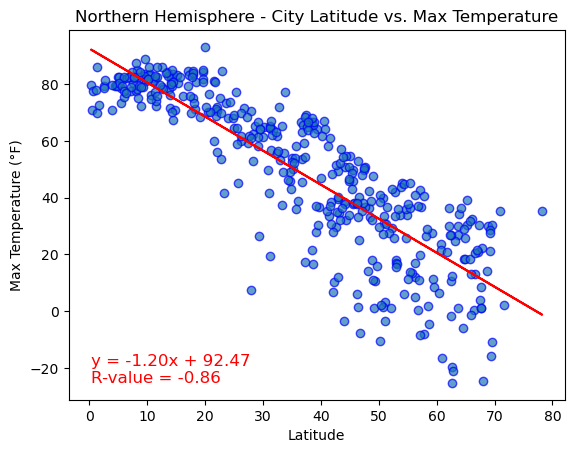

-0.8579775584466929

In [68]:
# Linear regression on Northern Hemisphere
def plot_linear_regression(x_values, y_values, x_label, y_label, title, figname):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept

    plt.scatter(x_values, y_values, marker="o", edgecolor="blue", alpha=0.7)

    plt.plot(x_values, regress_values, "r-")

    line_eq = f"y = {slope:.2f}x + {intercept:.2f}\nR-value = {rvalue:.2f}"  
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    plt.savefig(figname)

    plt.show()

    return rvalue


x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temperature (°F)"
title = "Northern Hemisphere - City Latitude vs. Max Temperature"
figname = "output_data/Northern_Hemi_Lat_vs_Max_Temp.png"

plot_linear_regression(x_values, y_values, x_label, y_label, title, figname)

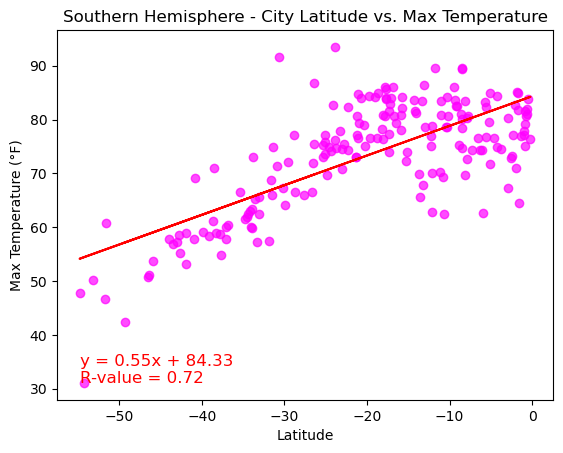

0.7215907764840307

In [72]:
# Linear regression on Southern Hemisphere
def plot_linear_regression(x_values, y_values, x_label, y_label, title, figname):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept

    plt.scatter(x_values, y_values, marker="o", color="magenta", alpha=0.7)

    plt.plot(x_values, regress_values, "r-")

    line_eq = f"y = {slope:.2f}x + {intercept:.2f}\nR-value = {rvalue:.2f}"  
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    plt.savefig(figname)

    plt.show()

    return rvalue
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Max Temp"]
x_label_southern = "Latitude"
y_label_southern = "Max Temperature (°F)"
title_southern = "Southern Hemisphere - City Latitude vs. Max Temperature"
figname_southern = "output_data/Southern_Hemi_Lat_vs_Max_Temp.png"

plot_linear_regression(x_values_southern, y_values_southern, x_label_southern, y_label_southern, title_southern, figname_southern)

**Discussion about the linear relationship:** This indicates a positive linear relationship between both latitude and temperature for the southern hemisphere. The relationship is of moderately high strength. As you move closer to the equator (lower latitudes) in the Southern Hemisphere, maximum temperatures tend to increase. This makes intuitive sense, as the equator is closest to the sun and tends to have higher temperatures. The opposite is true in the Northern Hemisphere; the farther away from the equator you go, the lower the max temperatures. The linear relationship between temperatures and max temps in the northern hemisphere is a bit stronger than in the southern hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

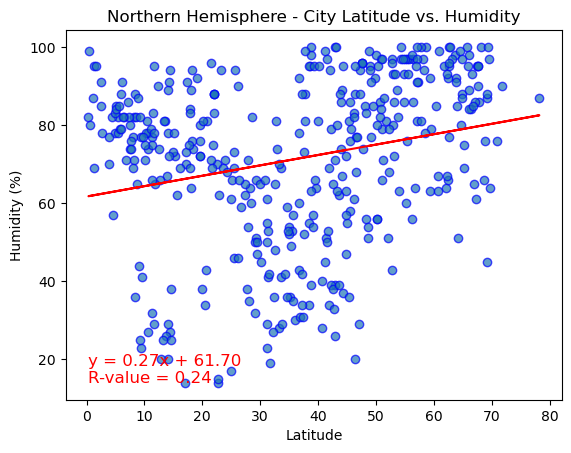

0.2413486660352361

In [74]:
# Northern Hemisphere
def plot_linear_regression(x_values, y_values, x_label, y_label, title, figname):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept

    plt.scatter(x_values, y_values, marker="o", edgecolor="blue", alpha=0.7)

    plt.plot(x_values, regress_values, "r-")

    line_eq = f"y = {slope:.2f}x + {intercept:.2f}\nR-value = {rvalue:.2f}"  
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    plt.savefig(figname)

    plt.show()

    return rvalue


x_values_northern = northern_hemi_df["Lat"]
y_values_northern_humidity = northern_hemi_df["Humidity"]
x_label_northern = "Latitude"
y_label_northern_humidity = "Humidity (%)"
title_northern = "Northern Hemisphere - City Latitude vs. Humidity"
figname_northern_humidity = "output_data/Northern_Hemi_Lat_vs_Humidity.png"

plot_linear_regression(x_values_northern, y_values_northern_humidity, x_label_northern, y_label_northern_humidity, title_northern, figname_northern_humidity)

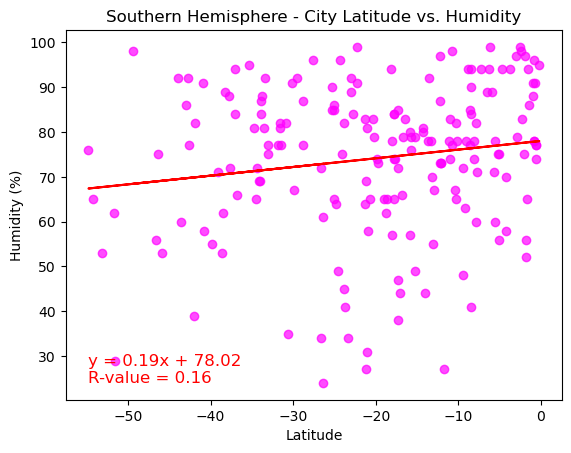

0.1578021345201257

In [73]:
# Southern Hemisphere
def plot_linear_regression(x_values, y_values, x_label, y_label, title, figname):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept

    plt.scatter(x_values, y_values, marker="o", color="magenta", alpha=0.7)

    plt.plot(x_values, regress_values, "r-")

    line_eq = f"y = {slope:.2f}x + {intercept:.2f}\nR-value = {rvalue:.2f}"  
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    plt.savefig(figname)

    plt.show()

    return rvalue


x_values_southern = southern_hemi_df["Lat"]
y_values_southern_humidity = southern_hemi_df["Humidity"]
x_label_southern = "Latitude"
y_label_southern_humidity = "Humidity (%)"
title_southern = "Southern Hemisphere - City Latitude vs. Humidity"
figname_southern_humidity = "output_data/Southern_Hemi_Lat_vs_Humidity.png"

plot_linear_regression(x_values_southern, y_values_southern_humidity, x_label_southern, y_label_southern_humidity, title_southern, figname_southern_humidity)

**Discussion about the linear relationship:** In both cases, the R-squared values are relatively low, indicating that latitude alone does not explain a significant portion of the variation in humidity. Other factors, such as geographical, climatic, and local conditions, likely have a stronger influence on humidity levels. Intuitively, this makes sense because humidity can be heavily influeced by the presence of inland water sources - such as lakes and rivers - that occur independently of latitude.

### Cloudiness vs. Latitude Linear Regression Plot

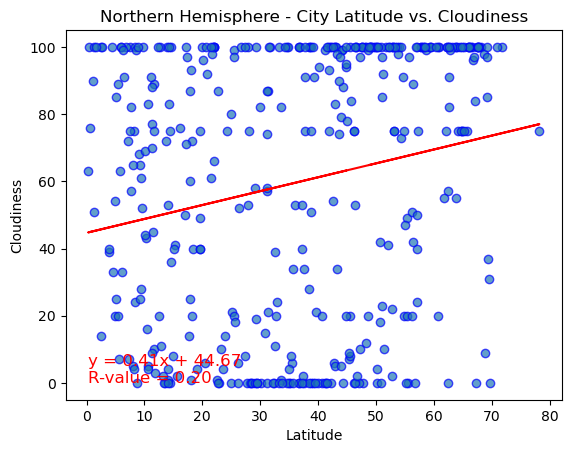

0.20345044650614308

In [79]:
# Northern Hemisphere
def plot_linear_regression(x_values, y_values, x_label, y_label, title, figname):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept

    plt.scatter(x_values, y_values, marker="o", edgecolor="blue", alpha=0.7)

    plt.plot(x_values, regress_values, "r-")

    line_eq = f"y = {slope:.2f}x + {intercept:.2f}\nR-value = {rvalue:.2f}"  
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    plt.savefig(figname)

    plt.show()

    return rvalue


x_values_northern = northern_hemi_df["Lat"]
y_values_northern_cloudiness = northern_hemi_df["Cloudiness"]
x_label_northern = "Latitude"
y_label_northern_cloudiness = "Cloudiness"
title_northern = "Northern Hemisphere - City Latitude vs. Cloudiness"
figname_northern_cloudiness = "output_data/Northern_Hemi_Lat_vs_Cloudiness.png"

plot_linear_regression(x_values_northern, y_values_northern_cloudiness, x_label_northern, y_label_northern_cloudiness, title_northern, figname_northern_cloudiness)

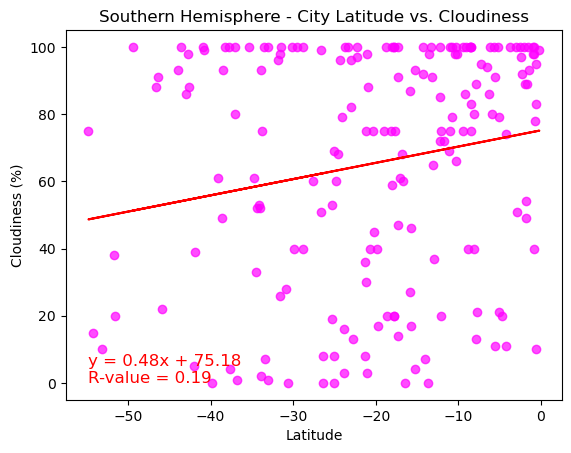

0.18966121934218622

In [80]:
# Southern Hemisphere
def plot_linear_regression(x_values, y_values, x_label, y_label, title, figname):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept

    plt.scatter(x_values, y_values, marker="o", color="magenta", alpha=0.7)

    plt.plot(x_values, regress_values, "r-")

    line_eq = f"y = {slope:.2f}x + {intercept:.2f}\nR-value = {rvalue:.2f}"  
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    plt.savefig(figname)

    plt.show()

    return rvalue

x_values_southern = southern_hemi_df["Lat"]
y_values_southern_cloudiness = southern_hemi_df["Cloudiness"]
x_label_southern = "Latitude"
y_label_southern_cloudiness = "Cloudiness (%)"
title_southern = "Southern Hemisphere - City Latitude vs. Cloudiness"
figname_southern_cloudiness = "output_data/Southern_Hemi_Lat_vs_Cloudiness.png"

plot_linear_regression(x_values_southern, y_values_southern_cloudiness, x_label_southern, y_label_southern_cloudiness, title_southern, figname_southern_cloudiness)

**Discussion about the linear relationship:** The linear relationship in both the northern and southern hemispheres in regards to cloudiness are similar to humidity. There's a weak relationship at most. Cloudiness is a similar phenomenon to humidity because they're both dewpoint based, and thereby reliant on other geographical factors than latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

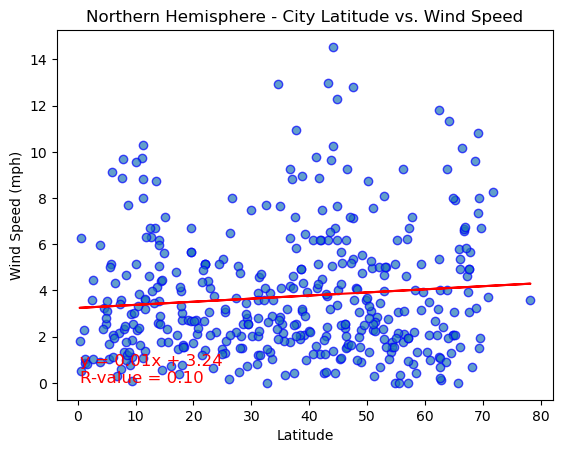

0.09844767645684456

In [75]:
# Northern Hemisphere
# Northern Hemisphere
def plot_linear_regression(x_values, y_values, x_label, y_label, title, figname):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept

    plt.scatter(x_values, y_values, marker="o", edgecolor="blue", alpha=0.7)

    plt.plot(x_values, regress_values, "r-")

    line_eq = f"y = {slope:.2f}x + {intercept:.2f}\nR-value = {rvalue:.2f}"  
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    plt.savefig(figname)

    plt.show()

    return rvalue


x_values_northern = northern_hemi_df["Lat"]
y_values_northern_wind_speed = northern_hemi_df["Wind Speed"]
x_label_northern = "Latitude"
y_label_northern_wind_speed = "Wind Speed (mph)"
title_northern = "Northern Hemisphere - City Latitude vs. Wind Speed"
figname_northern_wind_speed = "output_data/Northern_Hemi_Lat_vs_Wind_Speed.png"

plot_linear_regression(x_values_northern, y_values_northern_wind_speed, x_label_northern, y_label_northern_wind_speed, title_northern, figname_northern_wind_speed)

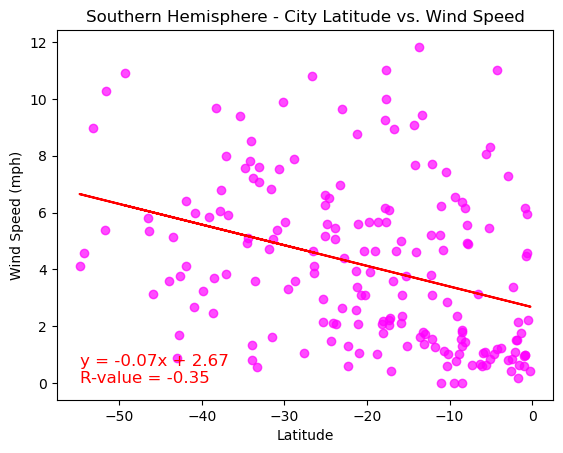

-0.3452396731255662

In [76]:
# Southern Hemisphere
def plot_linear_regression(x_values, y_values, x_label, y_label, title, figname):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept

    plt.scatter(x_values, y_values, marker="o", color="magenta", alpha=0.7)

    plt.plot(x_values, regress_values, "r-")

    line_eq = f"y = {slope:.2f}x + {intercept:.2f}\nR-value = {rvalue:.2f}"  
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    plt.savefig(figname)

    plt.show()

    return rvalue


x_values_southern = southern_hemi_df["Lat"]
y_values_southern_wind_speed = southern_hemi_df["Wind Speed"]
x_label_southern = "Latitude"
y_label_southern_wind_speed = "Wind Speed (mph)"
title_southern = "Southern Hemisphere - City Latitude vs. Wind Speed"
figname_southern_wind_speed = "output_data/Southern_Hemi_Lat_vs_Wind_Speed.png"

plot_linear_regression(x_values_southern, y_values_southern_wind_speed, x_label_southern, y_label_southern_wind_speed, title_southern, figname_southern_wind_speed)

**Discussion about the linear relationship:** There is a very weak positive linear relationship between latitude and wind speed in the Northern Hemisphere. This means that there is a very slight tendency for wind speed to increase slightly as you move away from the equator (toward higher latitudes) in the Northern Hemisphere, but not strongly enough to draw any meaningful inferences about causality. The inverse can be said for the southern hemisphere, albeit in a somewhat stronger positive connect. 

In both cases, the R-values are relatively close to zero, indicating that latitude alone does not explain much of the variation in wind speed. Other factors, such as local geography, topography, and climate patterns, likely have a more significant influence on wind speed.